# 19.5 Evaluating Performance Assignment 1
##  2. House prices model

In this exercise, you'll work on your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

* Load the **houseprices** data from Thinkful's database.
* Run your house prices model again and assess the goodness of fit of your model using F-test, R-squared, adjusted R-squared, AIC and BIC.
* Do you think your model is satisfactory? If so, why?
* In order to improve the goodness of fit of your model, try different model specifications by adding or removing some variables. 
* For each model you try, get the goodness of fit metrics and compare your models with each other. Which model is the best and why?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
from sklearn import linear_model
import statsmodels.formula.api as smf
import statsmodels.api as sm
from scipy.stats import bartlett
from scipy.stats import levene
import warnings

%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from houseprices', con=engine)
engine.dispose()

df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [3]:
# Target variable
Y = df['saleprice']

# Regression features
X = df[['overallqual', 'totalbsmtsf', 'firstflrsf', 'grlivarea',
      'garagecars', 'garagearea']]

# Linear Regression model object
lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [2.39970394e+04 2.43907676e+01 1.11859135e+01 4.31228864e+01
 1.45151932e+04 1.56639341e+01]

Intercept: 
 -102650.90069029017


In [4]:
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.762
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     775.0
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:17:51   Log-Likelihood:                -17496.
No. Observations:                1460   AIC:                         3.501e+04
Df Residuals:                    1453   BIC:                         3.504e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.027e+05   4903.994    -20.932      0.000   -1.12e+05    -9.3e+04
overallqual    2.4e+04   1083.393     22.150      0.000    2.19e+04    2.61e+04
totalbsmtsf    24.3908      4.318      5.649      0.000      15.921      32.860
firstflrsf     11.1859      5.032      2.223      0.026       1.315      21.057
grlivarea      43.1229      2.679     16.095      0.000      37.867      48.379
garagecars   1.452e+04   3018.621      4.809      0.000    8593.872    2.04e+04
garagearea     15.6639     10.475      1.495      0.135      -4.884      36.212
==============================================================================
Omnibus:                      431.781   Durbin-Watson:                   1.975
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            39208.253
Skew:                          -0.313   Prob(JB):                         0.00
Kurtosis:                      28.380   Cond. No.                     1.14e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.14e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Evaluating R-Squared
The R-squared and adjusted r-squared value for this model is .762 and .761 respectively. The high r-square values indicate a strong goodness of fit for the model. 

## Improving the Model
The garage area variable is not significant to the model, so this variable is being dropped. Furthermore, the normality of the target variable will evaluated. 

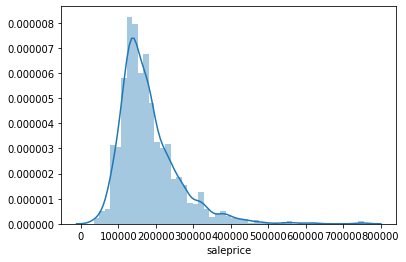

In [5]:
sns.distplot(df['saleprice'])
plt.show()

In [6]:
Y = np.log(df['saleprice'])

X.drop('garagearea', axis=1, inplace=True)

lrm = linear_model.LinearRegression()
lrm.fit(X, Y)

X = sm.add_constant(X)
results = sm.OLS(Y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.795
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     1125.
Date:                Mon, 19 Aug 2019   Prob (F-statistic):               0.00
Time:                        09:17:51   Log-Likelihood:                 424.09
No. Observations:                1460   AIC:                            -836.2
Df Residuals:                    1454   BIC:                            -804.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.5669      0.023    461.953      0.000      10.522      10.612
overallqual     0.1291      0.005     25.526      0.000       0.119       0.139
totalbsmtsf     0.0001   2.01e-05      5.906      0.000    7.91e-05       0.000
firstflrsf   3.889e-05   2.34e-05      1.659      0.097    -7.1e-06    8.49e-05
grlivarea       0.0002   1.25e-05     15.329      0.000       0.000       0.000
garagecars      0.1183      0.008     14.465      0.000       0.102       0.134
==============================================================================
Omnibus:                      827.467   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18745.845
Skew:                          -2.173   Prob(JB):                         0.00
Kurtosis:                      20.008   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

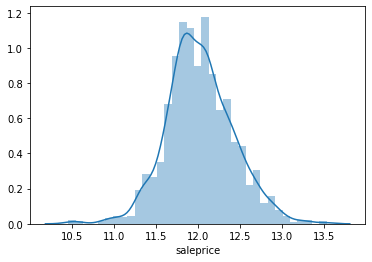

In [7]:
sns.distplot(Y)
plt.show()

## Evaluating R-Squared
By dropping the 'garage area' variable the coefficients are now all significant. Additionally, the log transformation normalized the target variable. This increased the r-squared and adjusted r-squared to .795 and .794 respectively. Both the AIC and BIC values decreased in the the improved model indicating  better performace. 